In [1]:
import pandas as pd
import requests
import os
from utils import *
import glob 
from sklearn.model_selection import train_test_split

In [2]:
'''
Creation of DataFrame and using only the Columns of Title,Rating,Genre and PosterLink
'''

data=pd.read_csv("/home/sreegs/Documents/Movie-Genre-Prediction-/archive/MovieGenre.csv",encoding='latin-1',usecols=['imdbId','Title','IMDB Score','Genre','Poster'])

In [3]:
data.head()

,imdbId,Title,IMDB Score,Genre,Poster
0,114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [4]:
print(data.dtypes)
print("\nNumber of Rows " + str(data.shape[0]))


imdbId          int64
Title          object
IMDB Score    float64
Genre          object
Poster         object
dtype: object

Number of Rows 40108


In [5]:
print(data.isnull().sum())
print("\n Number of Duplicated Entries : "+str(data.duplicated(subset='Title').sum()))

imdbId          0
Title           0
IMDB Score     48
Genre         145
Poster        725
dtype: int64

 Number of Duplicated Entries : 638


In [6]:
#Handling Missing Values,Since Each Data is Independent ,We can Drop the Rows with Missing values
data.dropna(axis=0,inplace=True)
data.drop_duplicates(subset='Title',inplace=True)
print(data.shape)

(38611, 5)


<h1>Data Analysis</h1>

In [7]:
import matplotlib.pyplot as plt 
print("Number of Movies : "+str(len(list(data.Title))))
genrelist=[]

for index,rows in data.iterrows():
    genre=str(rows.Genre)
    genre=genre.split('|')
    genrelist.extend(genre)
print("Number of Unique Genre are :"+str(len(list(set(genrelist)))))
print("Unique Genre are "+str(list(set(genrelist))))

Number of Movies : 38611
Number of Unique Genre are :28
Unique Genre are ['War', 'Game-Show', 'Thriller', 'Short', 'Biography', 'Film-Noir', 'Fantasy', 'Adult', 'Romance', 'Documentary', 'Drama', 'Mystery', 'Comedy', 'Family', 'Sci-Fi', 'Adventure', 'Musical', 'News', 'Music', 'Western', 'Sport', 'History', 'Crime', 'Action', 'Animation', 'Horror', 'Reality-TV', 'Talk-Show']


War 1139
Game-Show 1
Thriller 4719
Short 915
Biography 1928
Film-Noir 395
Fantasy 1971
Adult 9
Romance 6060
Documentary 3495
Drama 19496
Mystery 2348
Comedy 12361
Family 2060
Sci-Fi 1967
Adventure 3735
Musical 826
News 78
Music 1243
Western 832
Sport 682
History 1372
Crime 5150
Action 5224
Animation 1683
Horror 3923
Reality-TV 2
Talk-Show 6


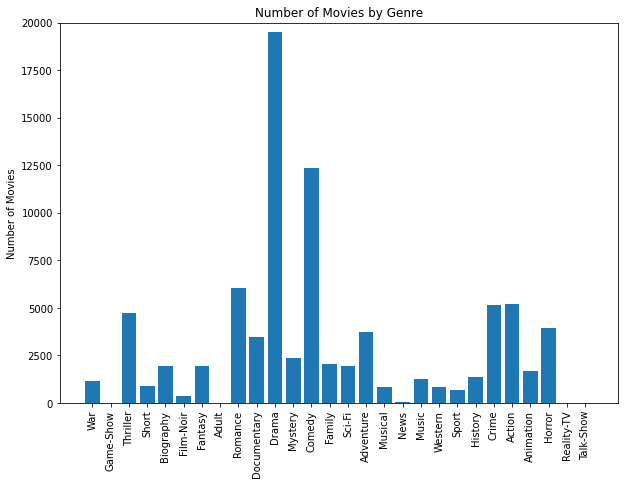

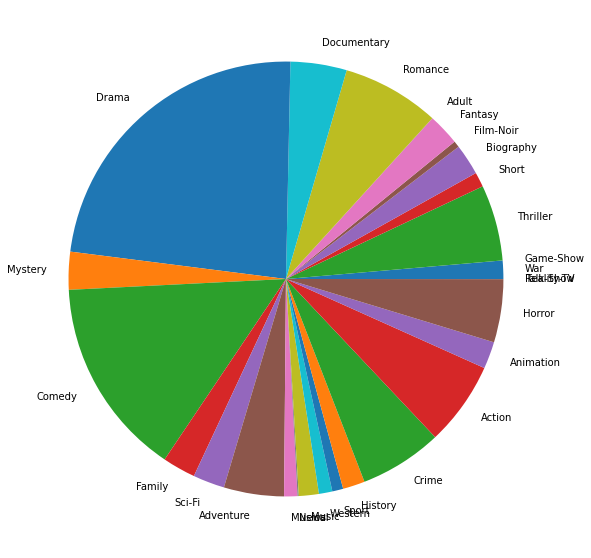

In [8]:
import numpy as np
unique_genres=list(set(genrelist))
countlist = []
k=0
for genre in unique_genres:
    ct = genrelist.count(genre)
    countlist.append(ct)
    print(genre + " " + str(ct))

#Create Bar Graph of values
y_pos = np.arange(len(unique_genres))
fig1=plt.figure(figsize=(10,7))
plt.bar(y_pos,countlist,align='center',alpha=1,linewidth=1)
plt.xticks(y_pos,unique_genres,rotation='vertical')
plt.ylim(0,20000)
plt.ylabel("Number of Movies")
plt.title("Number of Movies by Genre")
plt.show()

fig=plt.figure(figsize=(15,10))
plt.pie(countlist,labels=unique_genres)
plt.show()


War : 6.907024
Game-Show : 5.500000
Thriller : 5.911274
Short : 7.065792
Biography : 7.058662
Film-Noir : 6.958481
Fantasy : 6.156367
Adult : 4.322222
Romance : 6.520693
Documentary : 7.296938
Drama : 6.645620
Mystery : 6.304557
Comedy : 6.276450
Family : 6.317621
Sci-Fi : 5.500610
Adventure : 6.281312
Musical : 6.598305
News : 7.307692
Music : 6.753461
Western : 6.358774
Sport : 6.591202
History : 7.094315
Crime : 6.455767
Action : 5.974464
Animation : 6.833155
Horror : 5.351083
Reality-TV : 5.700000
Talk-Show : 7.916667


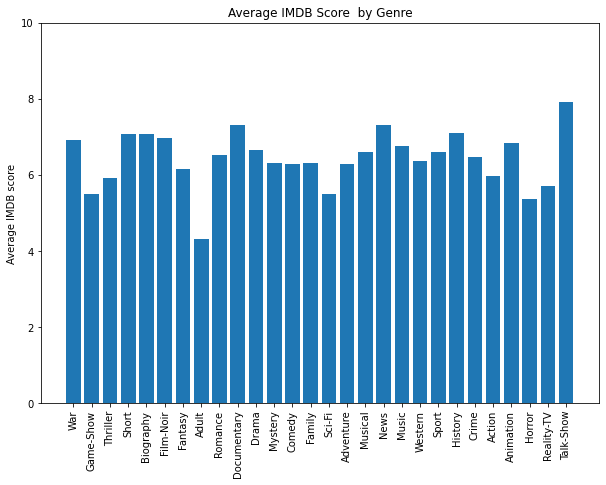

In [9]:
avg_list=[]
for genre in unique_genres:
    movie_genre=data[data['Genre'].str.contains(genre,na=False)]
    avg=movie_genre['IMDB Score'].mean()
    avg_list.append(avg)
    print("%s : %f"%(genre,avg))

y_pos = np.arange(len(unique_genres))
fig1=plt.figure(figsize=(10,7))
plt.bar(y_pos,avg_list,align='center',alpha=1,linewidth=1)
plt.xticks(y_pos,unique_genres,rotation='vertical')
plt.ylim(0,10)
plt.ylabel("Average IMDB score")
plt.title("Average IMDB Score  by Genre")
plt.show()


In [10]:
#DataSet Preparation for Training of the Model from the Sample Posters provided of 1000 Images
image_path=glob.glob("/home/sreegs/Documents/Movie-Genre-Prediction-/archive/Data/*.jpg")
x=[]
y=[]
classes=tuple()
for path in image_path:
    img_id=int(path.split('/')[-1][:-4])
    x.append(preprocess(path))
    y.append(np.asarray(get_genre(data,img_id)))   
    classes=classes+get_genre(data,img_id)
classes=set(classes)

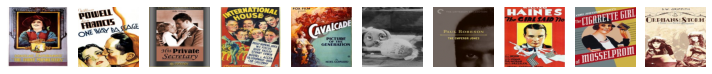

In [11]:
display_poster(x[0:10])
x=np.asarray(x,dtype=np.float)
y=np.asarray(y)

In [12]:
y,genre=Binarizer(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print("Number of training Samples: "+str(x_train.shape[0]))
print("Number of testing Samples: "+str(x_test.shape[0]))
## MODEL##Loading...
print("Size of Image is "+str((x_train.shape[1],x_train.shape[2])))

Number of training Samples: 797
Number of testing Samples: 200
Size of Image is (150, 150)


In [13]:
#Defining HyperParameters
epoch=5
lr=0.001
path='./Data'

In [14]:
from model import CNN

k=CNN(lr,150,1,2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [15]:
x=np.random.random(size=(50,150,150,1))
y=np.random.randint(low=1,high=3,size=(50,1))

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [17]:
history=k.train(x_train,y_train,x_test,y_test,epoch,1,path)

Epoch 1/5
40/40 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.2500WARNING:tensorflow:From /home/sreegs/miniconda3/envs/mypro/lib/python3.7/site-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./Data/assets
40/40 [==============================] - 7s 166ms/step - loss: 0.6932 - accuracy: 0.2500 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
40/40 [==============================] - 2s 48ms/step - loss: 0.6931 - accuracy: 0.2000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
40/40 [==============================] - 4s 90ms/step - loss: 0.6931 - accuracy: 0

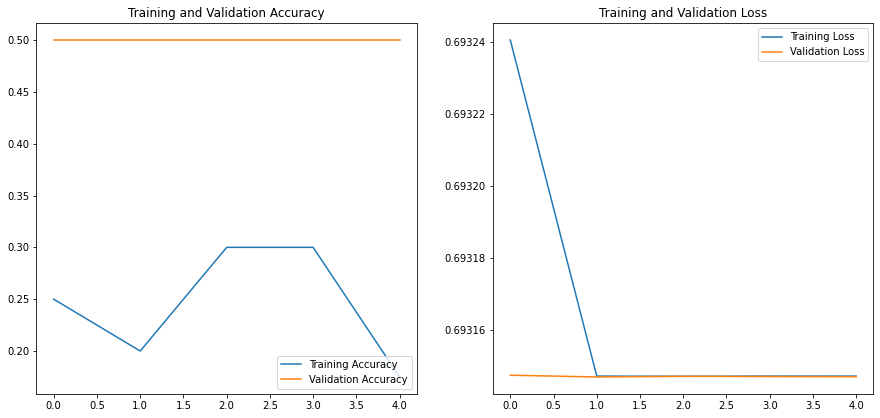

In [18]:
from model import analysis
analysis(history)